In [1]:
# filename: graph.ipynb
# purpose: data visualize analysis

# OHT data visualize & Analysis 

### Proessing flow
- 데이터 체크 - column, type, value and volumn
- 통계 분석 - statistics
- 추이 분석 - lineplot,
- 분산 분석 - historam, boxplot, violinplot
- 상관관계 분석 - heatmap, scatterplot

In [2]:
# packages
import time
import pathlib
import pandas as pd

import humanfriendly as human

import ohtconf as conf
import ohtcomm as comm
import ohtgraph as graph

## Main

In [3]:
mainstart = time.time()

In [4]:
# set float display format
pd.set_option("display.float_format", "{:.1f}".format)

In [5]:
# recreate chart output directory
comm.remove_directory(conf.DIRCHART)

pathlib.Path(conf.DIRCHART).mkdir(parents=True, exist_ok=True)  # create directory of pngfiles

In [6]:
# dataframe slice for chart
xs = conf.CHARTSLICE
# update this value to effect on this file
# xs = slice(conf.CHARTSLICE.start, conf.CHARTSLICE.stop, conf.CHARTSLICE.step)
print(f"chart dataframe slice={xs}")

chart dataframe slice=slice(600, 1100, 1)


In [7]:
# default plot size
# update conf.PLOTSIZE to effect on the graph.py functions
conf.PLOTSIZE = [conf.PLOTSIZE[0], conf.PLOTSIZE[1]]
print(f"chart plotsize={conf.PLOTSIZE}")

chart plotsize=[7, 5]


### 데이터 첵크 

In [8]:
# read table data
_start = time.time()

dfnoise = comm.read_tabdf(conf.TABNAME_NOISE)
dfnoise.sort_values(by=conf.COLUMN_NAMES[0], inplace=True)
dfnoise.reset_index(drop=True, inplace=True)

dfnorm = comm.read_tabdf(conf.TABNAME_NORM)
dfnorm.sort_values(by=conf.COLUMN_NAMES[0], inplace=True)
dfnorm.reset_index(drop=True, inplace=True)

dfoutl = comm.read_tabdf(conf.TABNAME_OUTL)
dfoutl.sort_values(by=conf.COLUMN_NAMES[0], inplace=True)
dfoutl.reset_index(drop=True, inplace=True)

_elapsed = time.time() - _start
print(f"Rea elapsed time: {human.format_timespan(_elapsed)}")

Rea elapsed time: 3.17 seconds


In [9]:
# data count
print(f"row count noise={len(dfnoise)}, norm={len(dfnorm)}, outl={len(dfoutl)}")

row count noise=0, norm=6095021, outl=2031674


In [10]:
# null checking
# dfnorm.info()

In [11]:
# null checking
# dfoutl.info()

In [12]:
# data sample check
dfnorm.head()

,DATETM,TEM,PM1,PM2_5,PM10,CO,NH3,CT1,CT2,CT3,CT4,MVAVG_TEM,MVSTD_TEM,MVSIG_TEM,MVAVG_PM1,MVSTD_PM1,MVSIG_PM1,MVAVG_PM2_5,MVSTD_PM2_5,MVSIG_PM2_5,MVAVG_PM10,MVSTD_PM10,MVSIG_PM10,MVAVG_CO,MVSTD_CO,MVSIG_CO,MVAVG_NH3,MVSTD_NH3,MVSIG_NH3,MVAVG_CT1,MVSTD_CT1,MVSIG_CT1,MVAVG_CT2,MVSTD_CT2,MVSIG_CT2,MVAVG_CT3,MVSTD_CT3,MVSIG_CT3,MVAVG_CT4,MVSTD_CT4,MVSIG_CT4,FLAG
0,2024-01-01 00:00:00.000,40.8,10,12,13,161,88,0.8,1.0,0.5,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.0,1,0
1,2024-01-01 00:00:00.100,40.8,10,12,13,161,88,0.8,1.0,0.5,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.0,1,0
2,2024-01-01 00:00:00.200,40.8,10,12,13,161,88,0.8,1.0,0.5,0.5,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.1,1,0
3,2024-01-01 00:00:00.300,40.8,10,12,13,161,88,0.9,1.0,0.5,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.1,1,0
4,2024-01-01 00:00:00.400,40.8,10,12,13,161,88,0.8,1.0,0.7,0.6,40.8,0.0,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.0,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.1,1,0.6,0.0,1,0


In [13]:
# data sample check
dfoutl.head()

,DATETM,TEM,PM1,PM2_5,PM10,CO,NH3,CT1,CT2,CT3,CT4,MVAVG_TEM,MVSTD_TEM,MVSIG_TEM,MVAVG_PM1,MVSTD_PM1,MVSIG_PM1,MVAVG_PM2_5,MVSTD_PM2_5,MVSIG_PM2_5,MVAVG_PM10,MVSTD_PM10,MVSIG_PM10,MVAVG_CO,MVSTD_CO,MVSIG_CO,MVAVG_NH3,MVSTD_NH3,MVSIG_NH3,MVAVG_CT1,MVSTD_CT1,MVSIG_CT1,MVAVG_CT2,MVSTD_CT2,MVSIG_CT2,MVAVG_CT3,MVSTD_CT3,MVSIG_CT3,MVAVG_CT4,MVSTD_CT4,MVSIG_CT4,FLAG
0,2024-01-01 00:00:00.000,40.8,10,12,13,161,88,0.8,1.0,0.5,0.6,40.8,0.1,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.0,0.7,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.0,1,0
1,2024-01-01 00:00:00.100,40.9,10,12,13,162,88,0.8,1.0,0.5,0.6,40.9,0.1,1,10.0,0.0,1,12.0,0.0,1,13.0,0.0,1,161.5,0.7,1,88.0,0.0,1,0.8,0.0,1,1.0,0.0,1,0.5,0.0,1,0.6,0.0,1,0
2,2024-01-01 00:00:00.200,41.0,11,13,14,162,89,0.8,1.0,0.6,0.6,40.9,0.1,1,10.3,0.6,1,12.3,0.6,1,13.3,0.6,1,161.7,0.6,1,88.3,0.6,1,0.8,0.0,1,1.0,0.0,1,0.5,0.1,1,0.6,0.0,1,0
3,2024-01-01 00:00:00.300,41.3,11,13,14,162,89,0.8,1.1,0.6,0.7,41.0,0.2,1,10.5,0.6,1,12.5,0.6,1,13.5,0.6,1,161.8,0.5,1,88.5,0.6,1,0.8,0.0,1,1.0,0.1,1,0.6,0.1,1,0.6,0.0,1,0
4,2024-01-01 00:00:00.400,41.3,11,14,14,163,89,0.9,1.1,0.6,0.7,41.1,0.2,1,10.6,0.5,1,12.8,0.8,1,13.6,0.5,1,162.0,0.7,1,88.6,0.5,1,0.8,0.0,1,1.0,0.1,1,0.6,0.1,1,0.6,0.1,1,0


### 테이터 통계 분석

In [14]:
# data statistics
dfnorm.describe()

,DATETM,TEM,PM1,PM2_5,PM10,CO,NH3,CT1,CT2,CT3,CT4,MVAVG_TEM,MVSTD_TEM,MVSIG_TEM,MVAVG_PM1,MVSTD_PM1,MVSIG_PM1,MVAVG_PM2_5,MVSTD_PM2_5,MVSIG_PM2_5,MVAVG_PM10,MVSTD_PM10,MVSIG_PM10,MVAVG_CO,MVSTD_CO,MVSIG_CO,MVAVG_NH3,MVSTD_NH3,MVSIG_NH3,MVAVG_CT1,MVSTD_CT1,MVSIG_CT1,MVAVG_CT2,MVSTD_CT2,MVSIG_CT2,MVAVG_CT3,MVSTD_CT3,MVSIG_CT3,MVAVG_CT4,MVSTD_CT4,MVSIG_CT4,FLAG
count,6095021,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0,6095021.0
mean,2024-01-04 12:39:11.000005120,42.1,9.4,10.8,12.3,157.2,98.2,0.6,1.0,0.4,0.6,42.1,0.1,1.0,9.4,0.7,1.0,10.8,0.7,1.0,12.3,0.6,1.0,157.2,2.5,1.0,98.2,0.7,1.0,0.6,0.1,1.0,1.0,0.1,1.0,0.4,0.1,1.0,0.6,0.1,1.0,0.0
min,2024-01-01 00:00:00,22.6,7.0,8.0,9.0,31.0,66.0,-0.5,0.2,0.2,0.3,31.6,0.0,1.0,7.6,0.0,1.0,8.6,0.0,1.0,10.3,0.0,1.0,81.8,0.0,1.0,80.0,0.0,1.0,0.0,0.0,1.0,0.6,0.0,1.0,0.3,0.0,1.0,0.5,0.0,1.0,0.0
25%,2024-01-02 18:19:35.500000,40.8,8.0,9.0,11.0,141.0,88.0,0.3,0.9,0.4,0.5,40.8,0.0,1.0,8.3,0.4,1.0,9.6,0.4,1.0,11.3,0.4,1.0,140.6,1.3,1.0,88.1,0.5,1.0,0.3,0.1,1.0,1.0,0.1,1.0,0.4,0.1,1.0,0.5,0.1,1.0,0.0
50%,2024-01-04 12:39:11,41.7,9.0,11.0,12.0,158.0,93.0,0.6,1.0,0.4,0.6,41.6,0.0,1.0,8.6,0.5,1.0,10.3,0.6,1.0,11.7,0.5,1.0,157.4,1.5,1.0,93.1,0.6,1.0,0.6,0.1,1.0,1.0,0.1,1.0,0.4,0.1,1.0,0.6,0.1,1.0,0.0
75%,2024-01-06 06:58:46.500000,43.5,10.0,12.0,13.0,170.0,110.0,0.9,1.0,0.5,0.6,43.5,0.1,1.0,10.3,1.0,1.0,12.1,0.9,1.0,13.2,0.7,1.0,169.6,1.8,1.0,109.8,0.7,1.0,0.9,0.1,1.0,1.0,0.1,1.0,0.5,0.1,1.0,0.6,0.1,1.0,0.0
max,2024-01-08 01:18:22,45.5,27.0,29.0,42.0,253.0,140.0,3.0,1.5,0.8,1.0,45.3,8.6,1.0,17.5,6.3,1.0,18.8,6.4,1.0,20.3,7.4,1.0,248.5,68.3,1.0,122.5,17.7,1.0,1.8,0.6,1.0,1.2,0.4,1.0,0.6,0.1,1.0,0.7,0.2,1.0,0.0
std,NaN,1.7,1.6,1.6,1.5,28.8,12.4,0.3,0.1,0.1,0.1,1.7,0.3,0.0,1.4,0.4,0.0,1.5,0.3,0.0,1.3,0.3,0.0,28.2,5.4,0.0,12.4,0.4,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# data statistics
dfoutl.describe()

,DATETM,TEM,PM1,PM2_5,PM10,CO,NH3,CT1,CT2,CT3,CT4,MVAVG_TEM,MVSTD_TEM,MVSIG_TEM,MVAVG_PM1,MVSTD_PM1,MVSIG_PM1,MVAVG_PM2_5,MVSTD_PM2_5,MVSIG_PM2_5,MVAVG_PM10,MVSTD_PM10,MVSIG_PM10,MVAVG_CO,MVSTD_CO,MVSIG_CO,MVAVG_NH3,MVSTD_NH3,MVSIG_NH3,MVAVG_CT1,MVSTD_CT1,MVSIG_CT1,MVAVG_CT2,MVSTD_CT2,MVSIG_CT2,MVAVG_CT3,MVSTD_CT3,MVSIG_CT3,MVAVG_CT4,MVSTD_CT4,MVSIG_CT4,FLAG
count,2031674,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0,2031674.0
mean,2024-01-02 04:13:03.649996544,44.6,18.0,19.0,19.8,169.6,95.7,1.4,1.4,1.1,1.1,44.6,3.0,1.0,18.0,6.8,1.0,19.0,6.3,1.0,19.8,5.8,1.0,169.6,6.0,1.0,95.7,4.1,1.0,1.4,0.4,1.0,1.4,0.4,1.0,1.1,0.5,1.0,1.1,0.5,1.0,0.0
min,2024-01-01 00:00:00,39.3,9.0,11.0,12.0,149.0,80.0,0.7,1.0,0.4,0.5,40.8,0.1,1.0,10.0,0.0,1.0,12.0,0.0,1.0,13.0,0.0,1.0,155.7,0.0,1.0,83.0,0.0,1.0,0.8,0.0,1.0,1.0,0.0,1.0,0.5,0.0,1.0,0.6,0.0,1.0,0.0
25%,2024-01-01 14:06:31.824999936,41.6,11.0,13.0,14.0,162.0,89.0,1.0,1.0,0.5,0.6,43.9,2.6,1.0,17.1,6.5,1.0,18.2,6.1,1.0,19.0,5.6,1.0,165.0,4.0,1.0,90.9,3.3,1.0,1.3,0.3,1.0,1.3,0.3,1.0,1.0,0.5,1.0,1.0,0.5,1.0,0.0
50%,2024-01-02 04:13:03.649999872,44.1,16.0,18.0,18.0,171.0,96.0,1.3,1.3,0.9,1.0,44.6,3.2,1.0,18.0,6.8,1.0,19.0,6.3,1.0,19.8,5.8,1.0,168.6,6.4,1.0,92.9,4.3,1.0,1.4,0.4,1.0,1.4,0.4,1.0,1.1,0.5,1.0,1.1,0.5,1.0,0.0
75%,2024-01-02 18:19:35.475000064,47.7,25.0,25.0,25.0,178.0,100.0,1.7,1.7,1.6,1.6,45.4,3.4,1.0,19.0,7.1,1.0,19.8,6.5,1.0,20.6,6.0,1.0,173.2,8.7,1.0,101.4,5.2,1.0,1.5,0.4,1.0,1.4,0.4,1.0,1.1,0.6,1.0,1.2,0.5,1.0,0.0
max,2024-01-03 08:26:07.300000,50.0,30.0,30.0,30.0,185.0,116.0,2.0,2.0,2.0,2.0,47.9,4.1,1.0,24.1,8.1,1.0,24.2,7.3,1.0,24.7,6.9,1.0,183.2,11.7,1.0,112.5,7.9,1.0,1.9,0.5,1.0,1.7,0.4,1.0,1.5,0.6,1.0,1.5,0.6,1.0,0.0
std,NaN,3.2,6.9,6.4,5.9,9.0,8.0,0.4,0.4,0.5,0.5,1.0,0.5,0.0,1.3,0.4,0.0,1.2,0.3,0.0,1.1,0.3,0.0,5.9,3.0,0.0,6.6,1.6,0.0,0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0


### 데이터 추이 분석

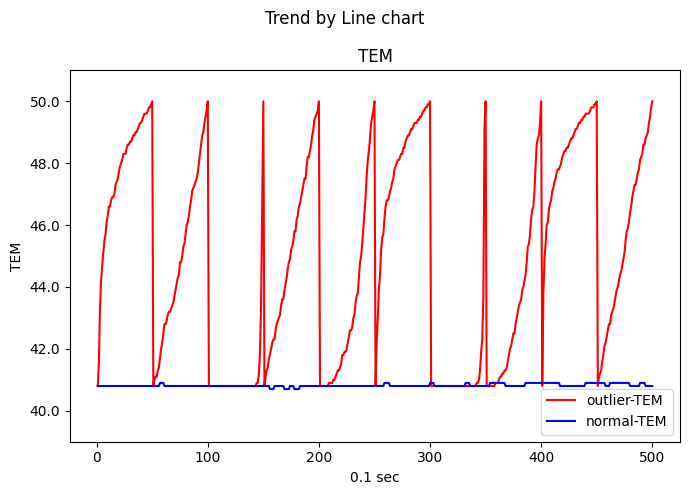

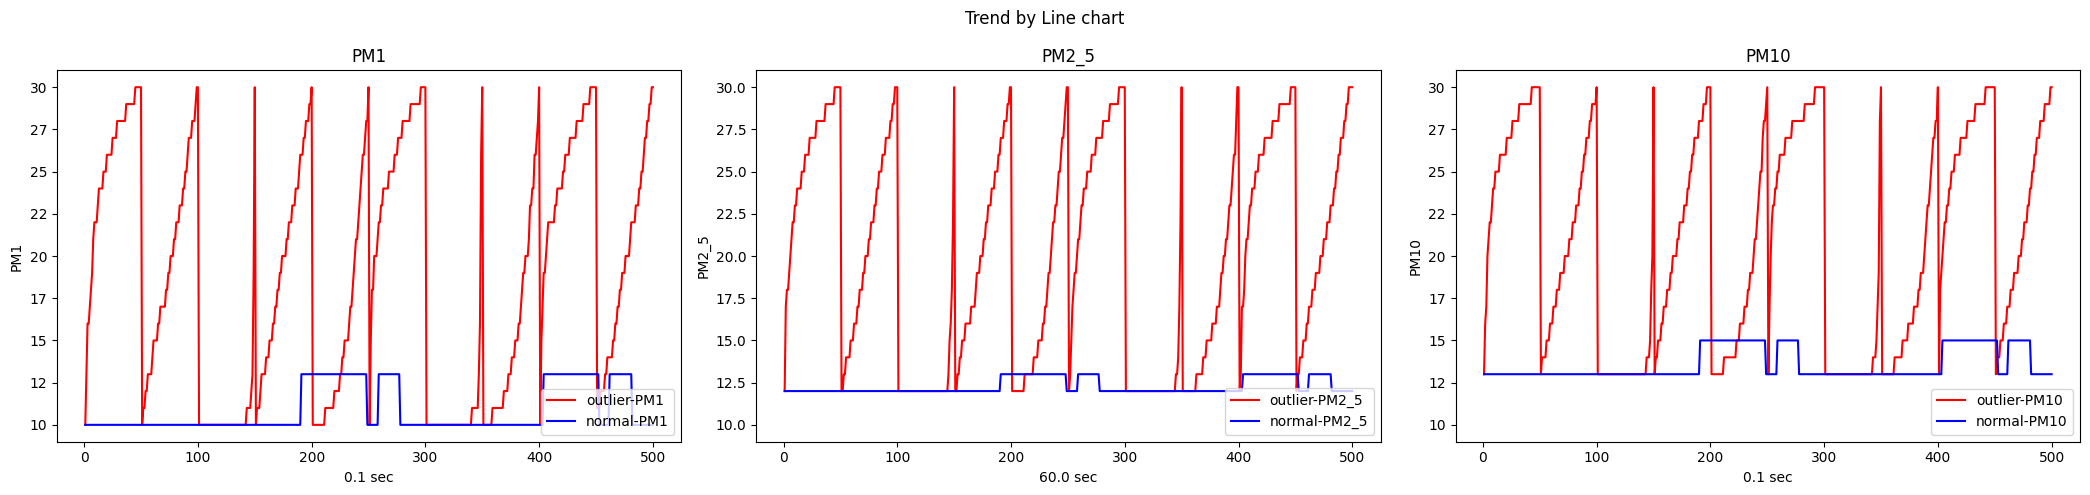

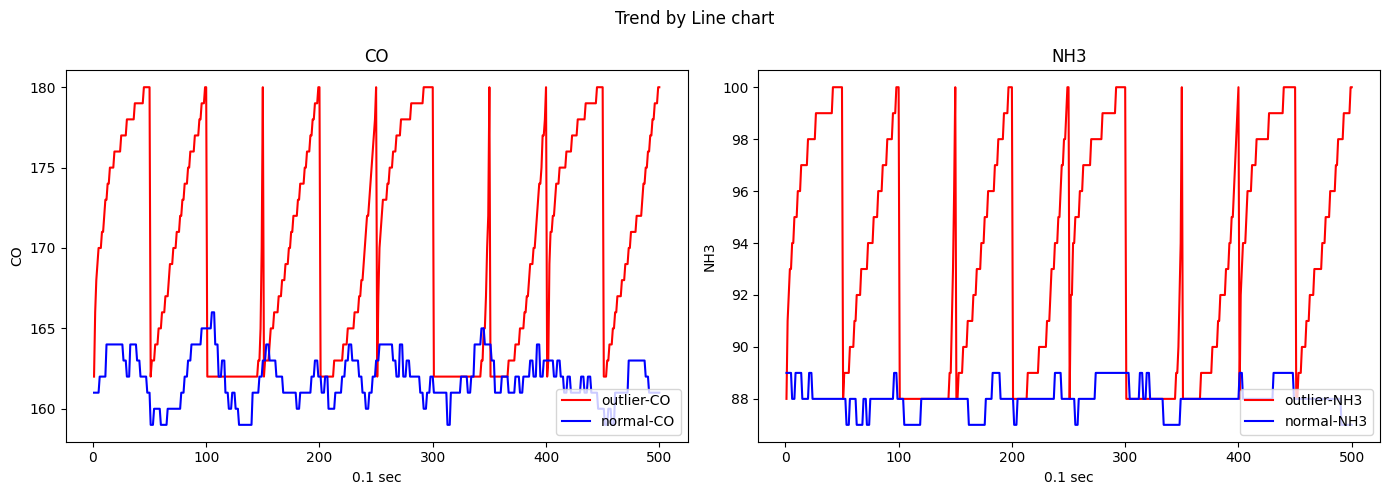

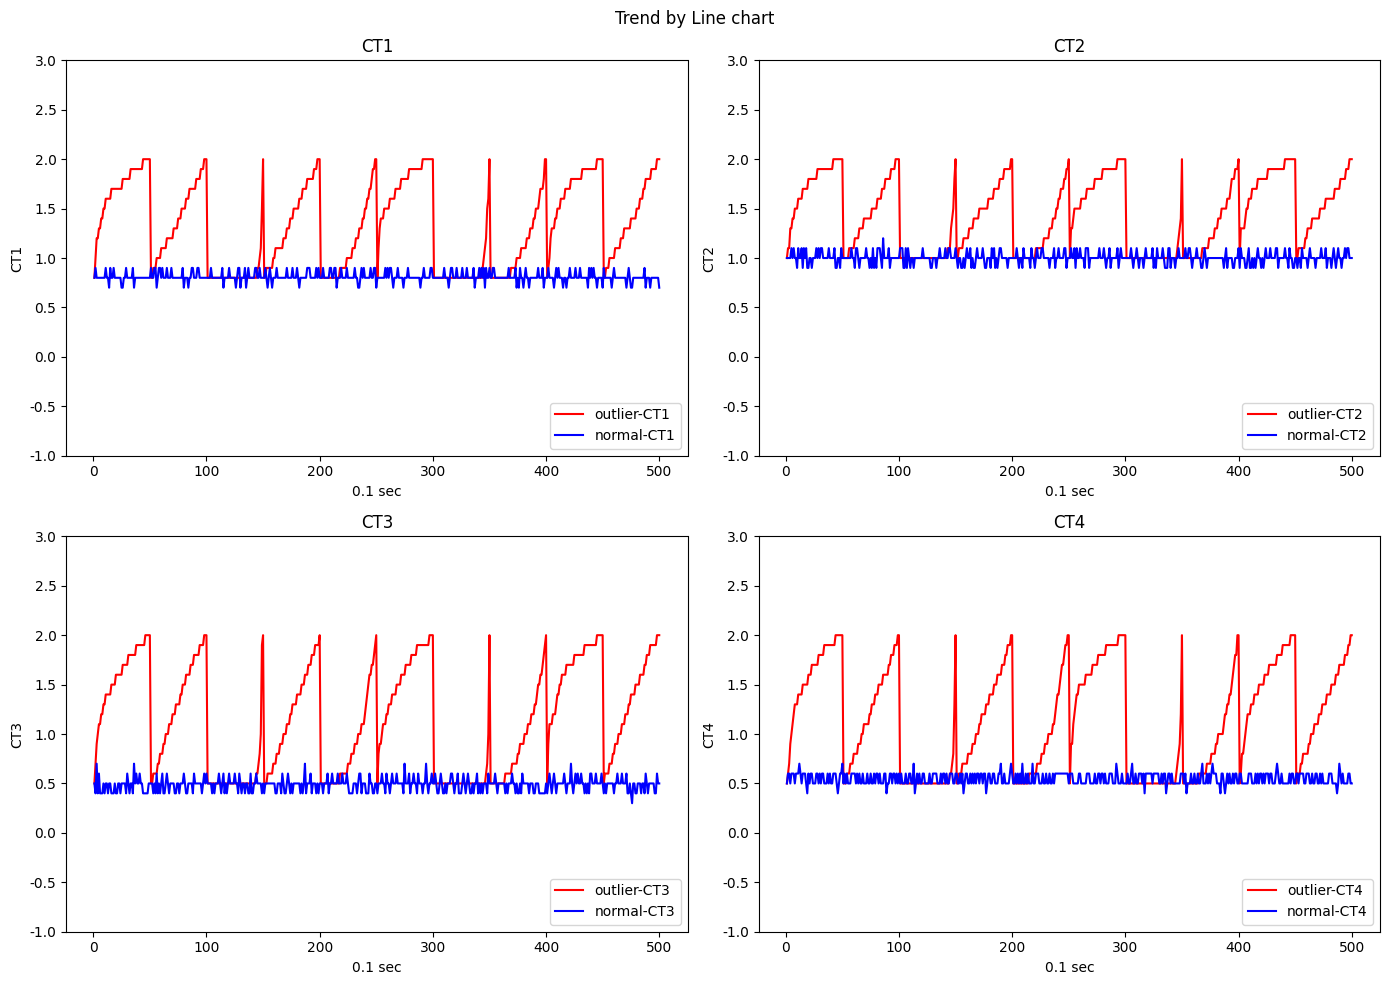

In [16]:
# line chart
ggrids = [["tem", (1, 1)], ["pma", (1, 3)], ["coa", (1, 2)], ["cta", (2, 2)]]
for ggrid, cols in zip(ggrids, [conf.COLUMN_TEM, conf.COLUMN_PMA, conf.COLUMN_COA, conf.COLUMN_CTA]):
    graph.linechart(
        dfs=[dfoutl[xs], dfnorm[xs]],
        labels=["outlier", "normal"],
        cols=cols,
        grid=ggrid[1],
        pngfile=f"outl-norm-line-{ggrid[0]}.png",
    )

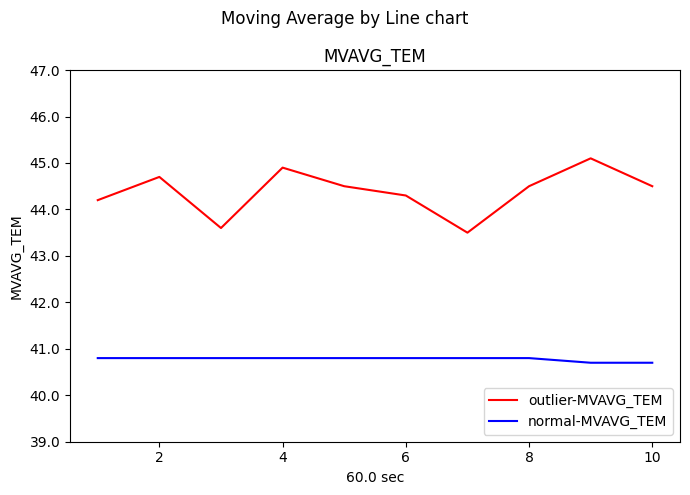

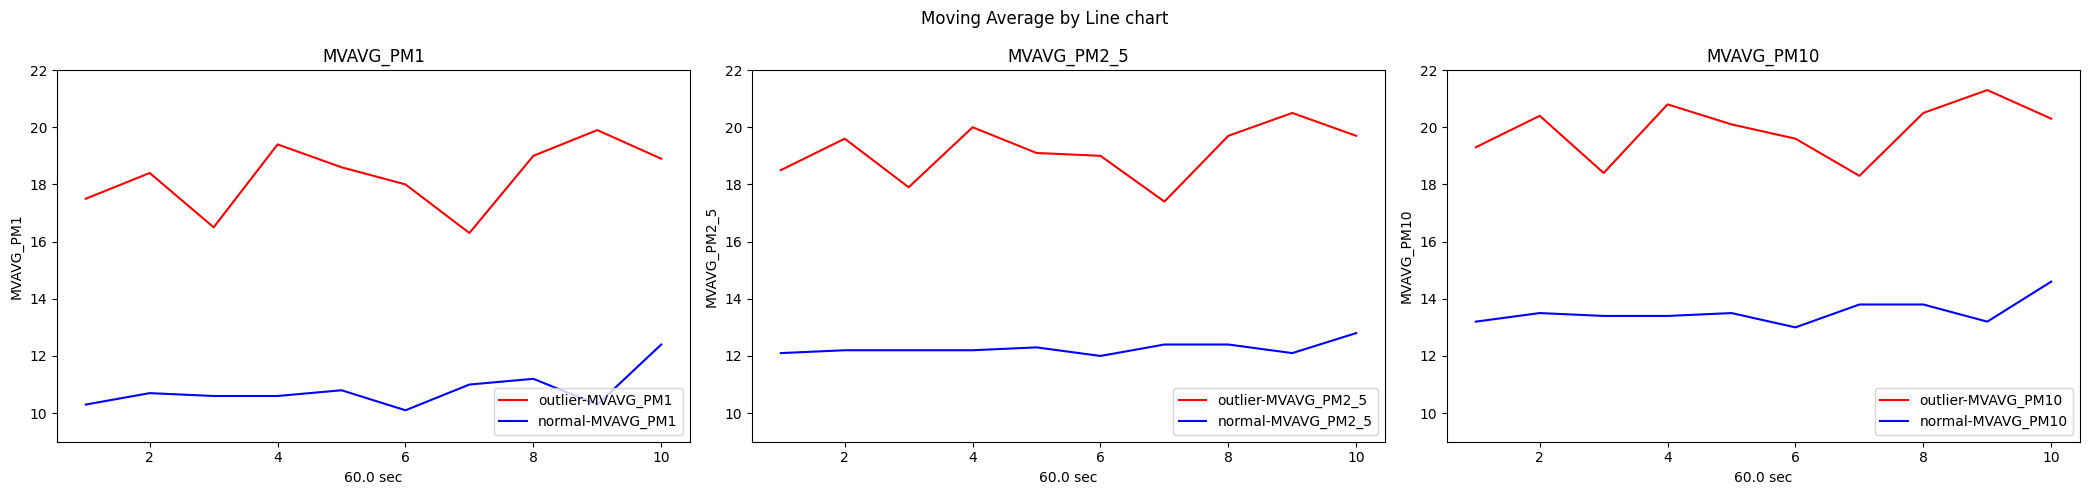

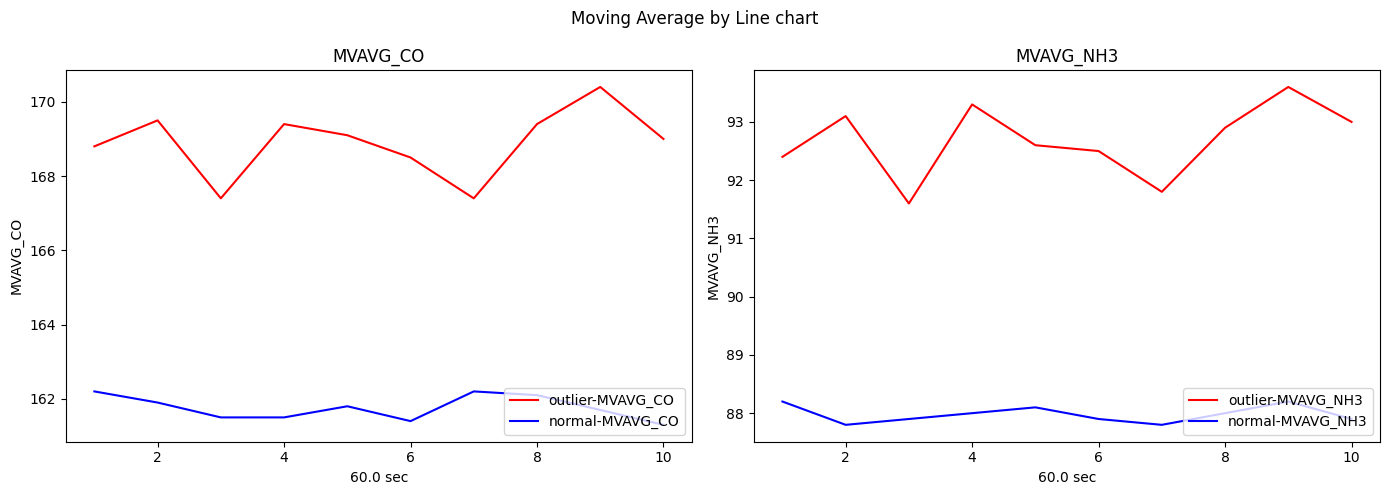

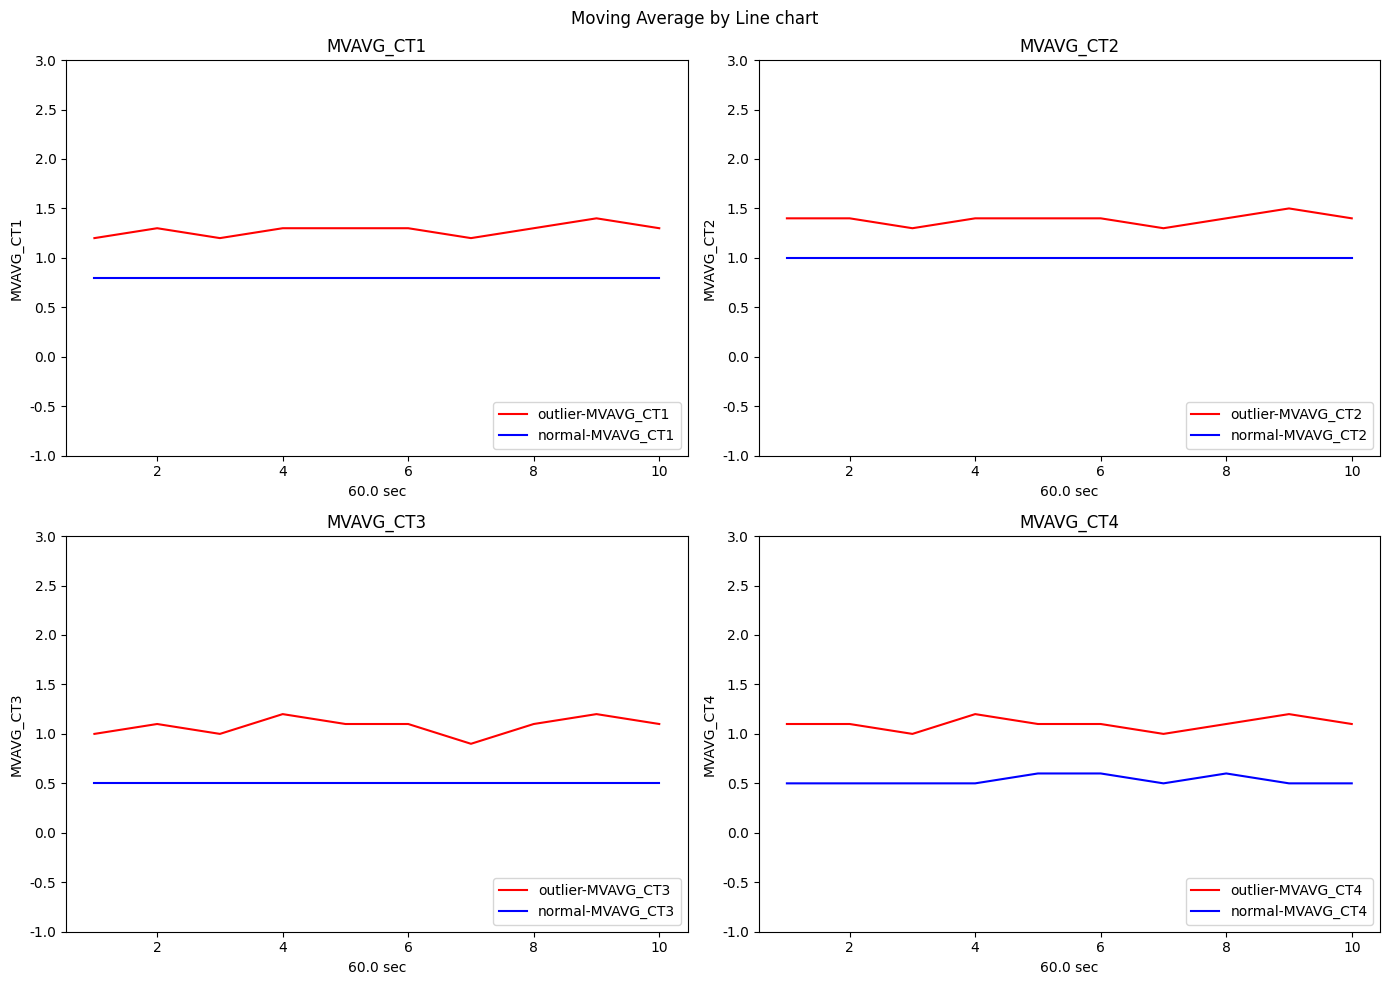

In [17]:
# line chart - moving average
mvs = slice(
    conf.CHARTSLICE.start, min(len(dfoutl), conf.CHARTSLICE.start + conf.POINTS["MOVING"] * 10), conf.POINTS["MOVING"]
)

mvavg_tem = [conf.MVAVG + col for col in conf.COLUMN_TEM]
mvavg_pma = [conf.MVAVG + col for col in conf.COLUMN_PMA]
mvavg_coa = [conf.MVAVG + col for col in conf.COLUMN_COA]
mvavg_cta = [conf.MVAVG + col for col in conf.COLUMN_CTA]

ggrids = [["tem", (1, 1)], ["pma", (1, 3)], ["coa", (1, 2)], ["cta", (2, 2)]]
for ggrid, cols in zip(ggrids, [mvavg_tem, mvavg_pma, mvavg_coa, mvavg_cta]):
    graph.linechart(
        dfs=[dfoutl[mvs], dfnorm[mvs]],
        labels=["outlier", "normal"],
        cols=cols,
        grid=ggrid[1],
        title="Moving Average by Line chart",
        pngfile=f"outl-norm-mvavg-line-{ggrid[0]}.png",
    )

### 데이터 분산 분석

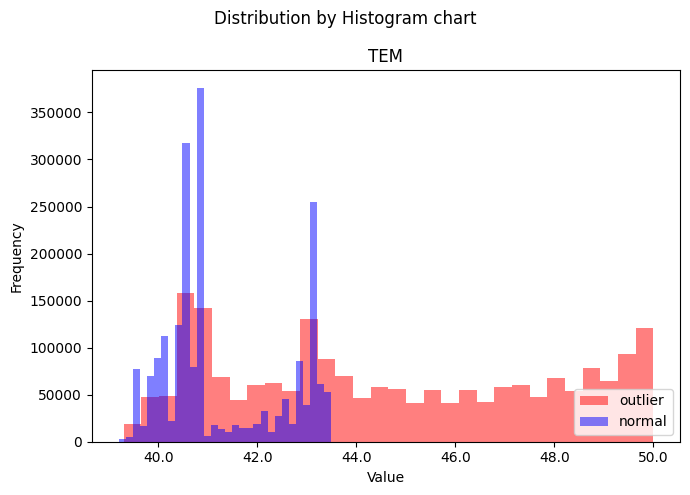

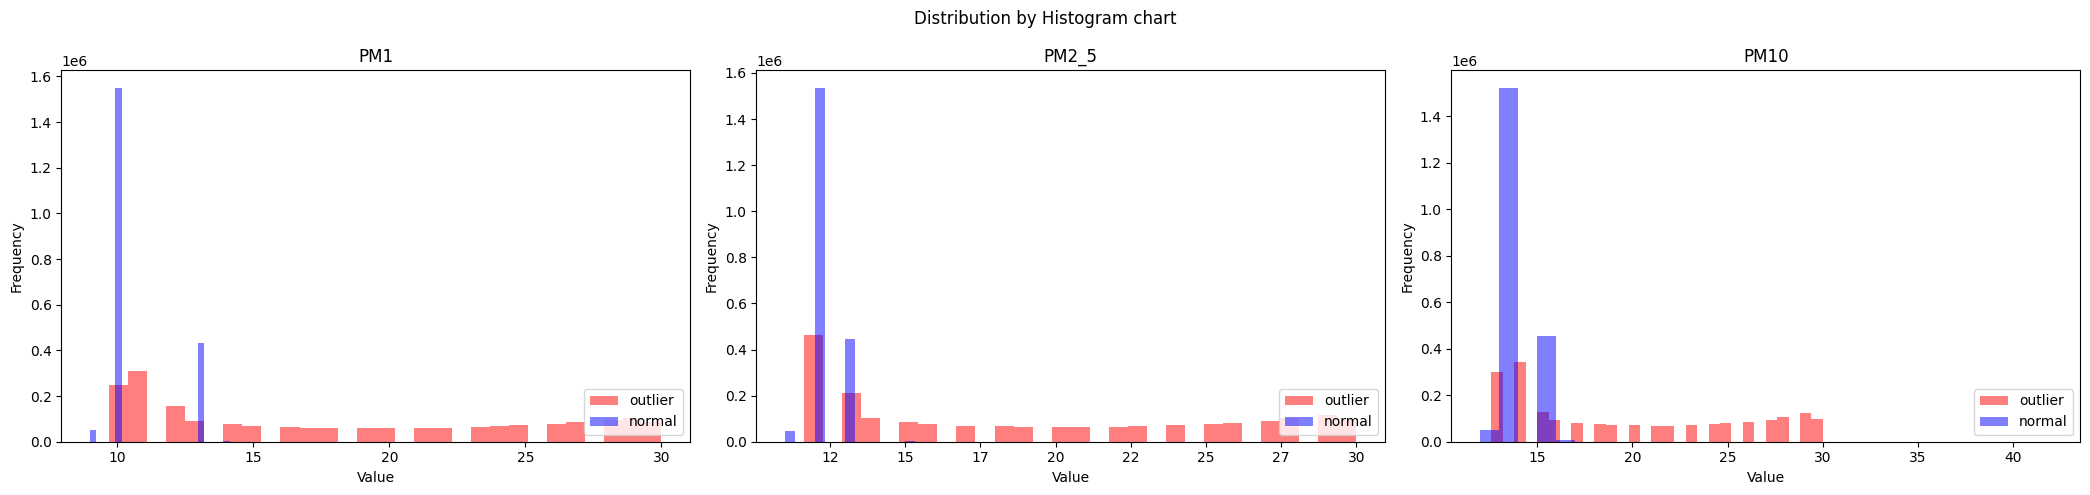

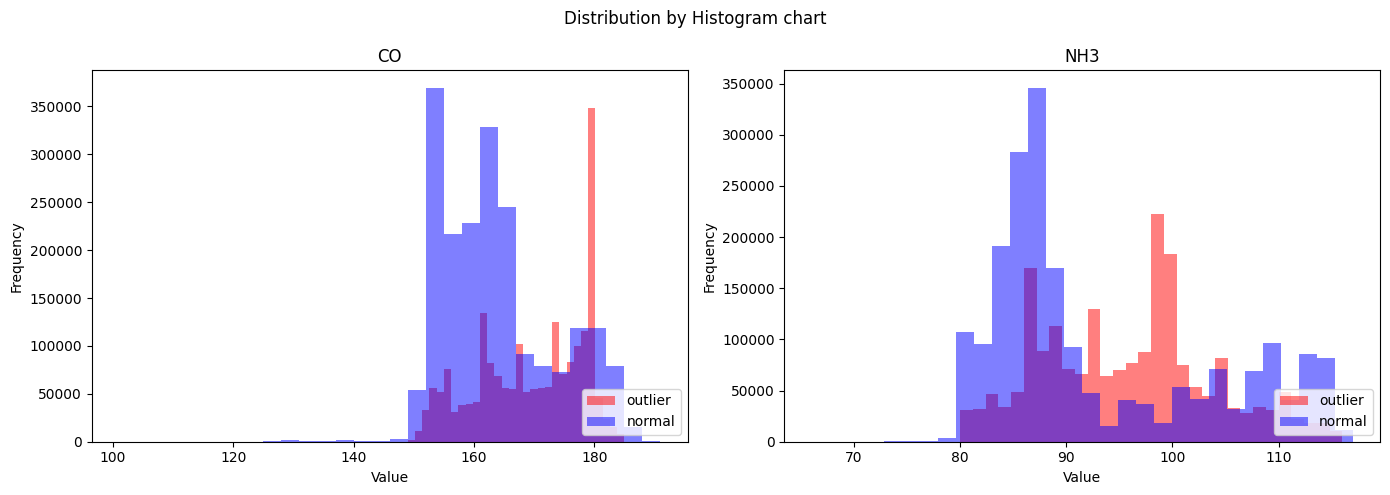

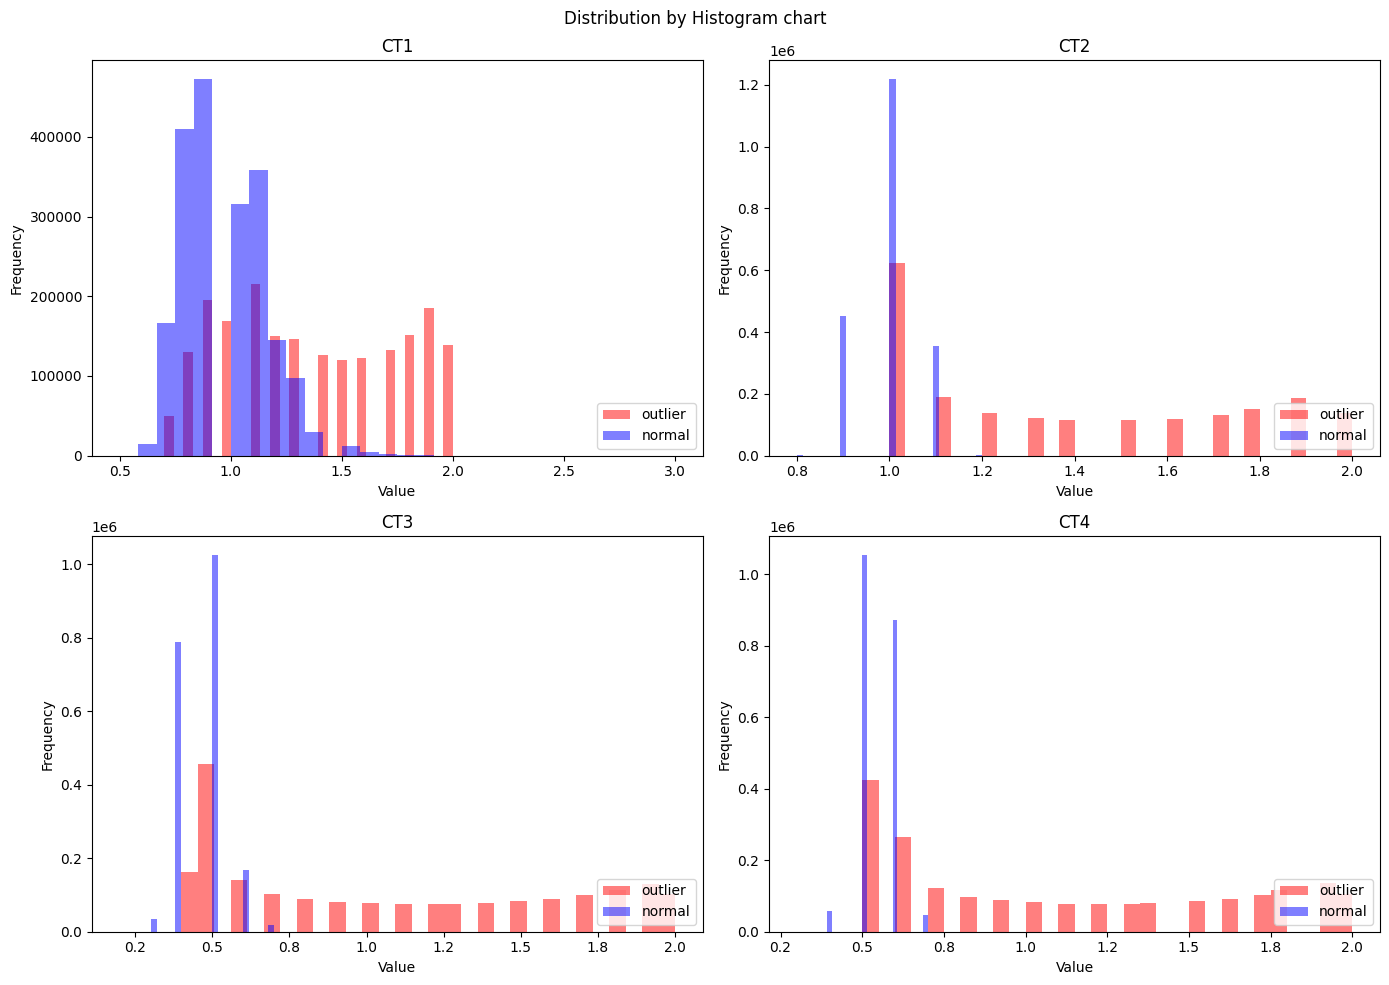

In [18]:
# histogram chart
ggrids = [["tem", (1, 1)], ["pma", (1, 3)], ["coa", (1, 2)], ["cta", (2, 2)]]
for ggrid, cols in zip(ggrids, [conf.COLUMN_TEM, conf.COLUMN_PMA, conf.COLUMN_COA, conf.COLUMN_CTA]):
    graph.histchart(
        dfs=[dfoutl, dfnorm.iloc[: len(dfoutl)]],
        labels=["outlier", "normal"],
        cols=cols,
        grid=ggrid[1],
        pngfile=f"outl-norm-hist-{ggrid[0]}.png",
    )

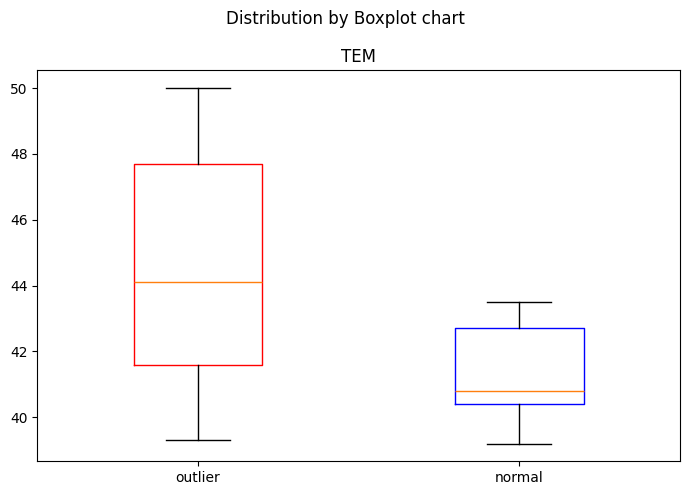

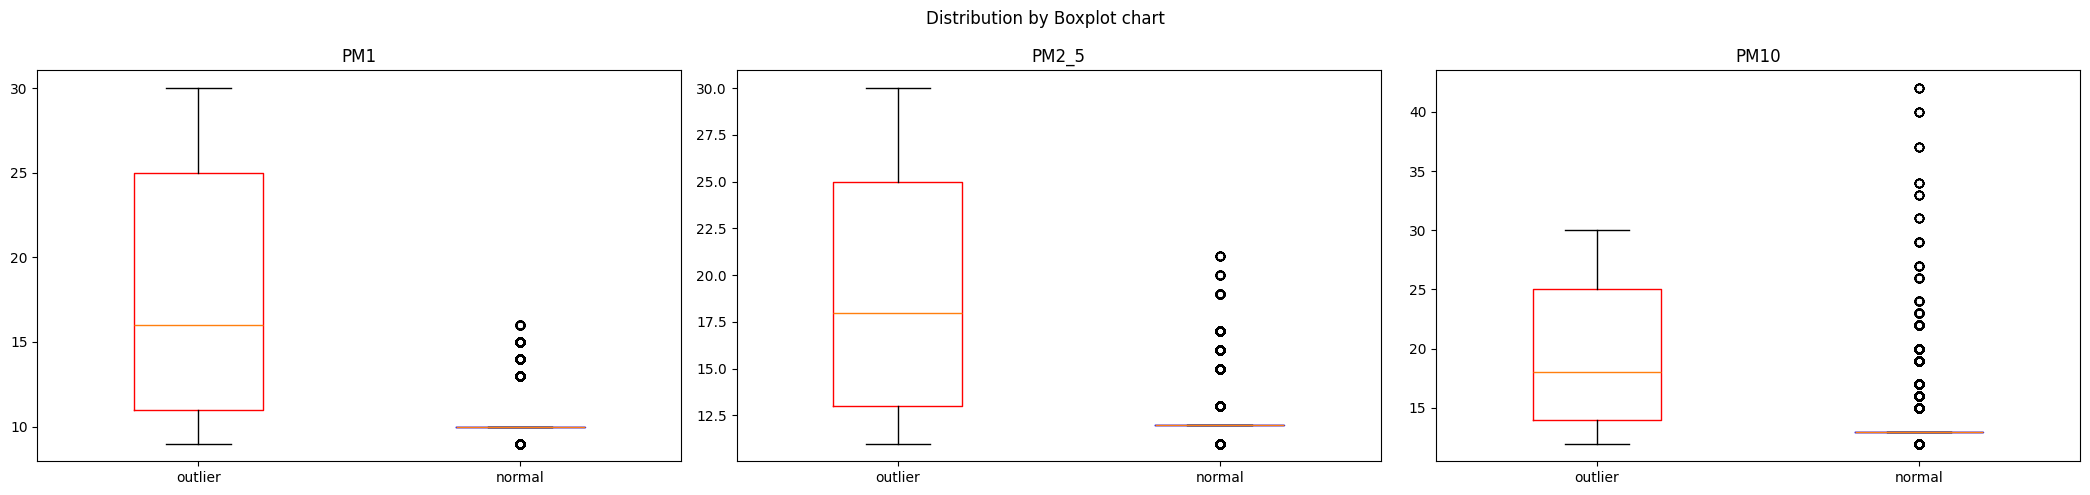

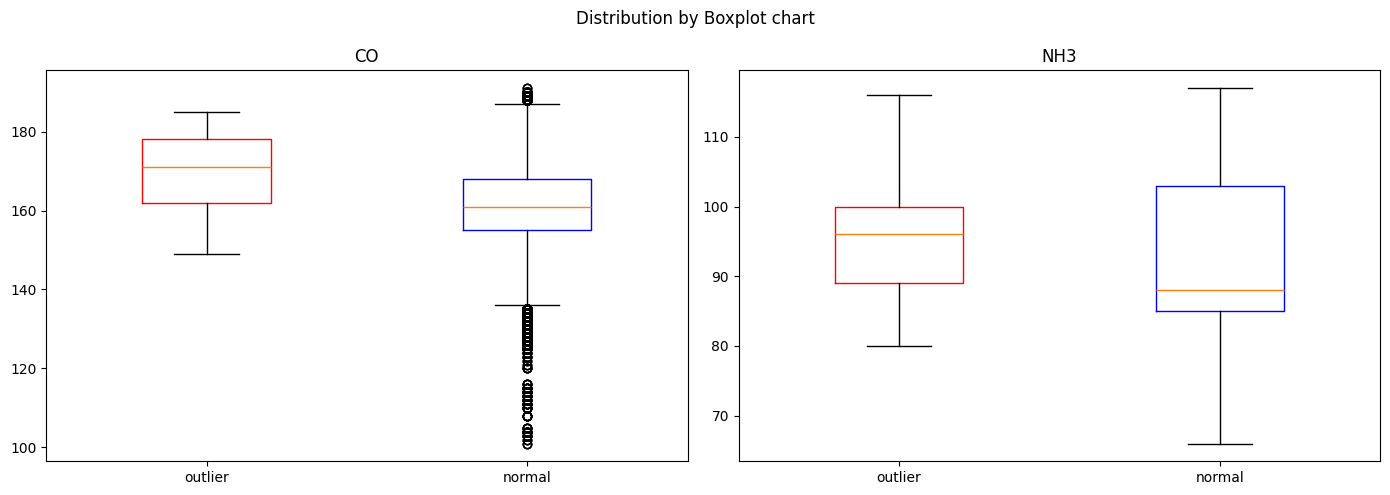

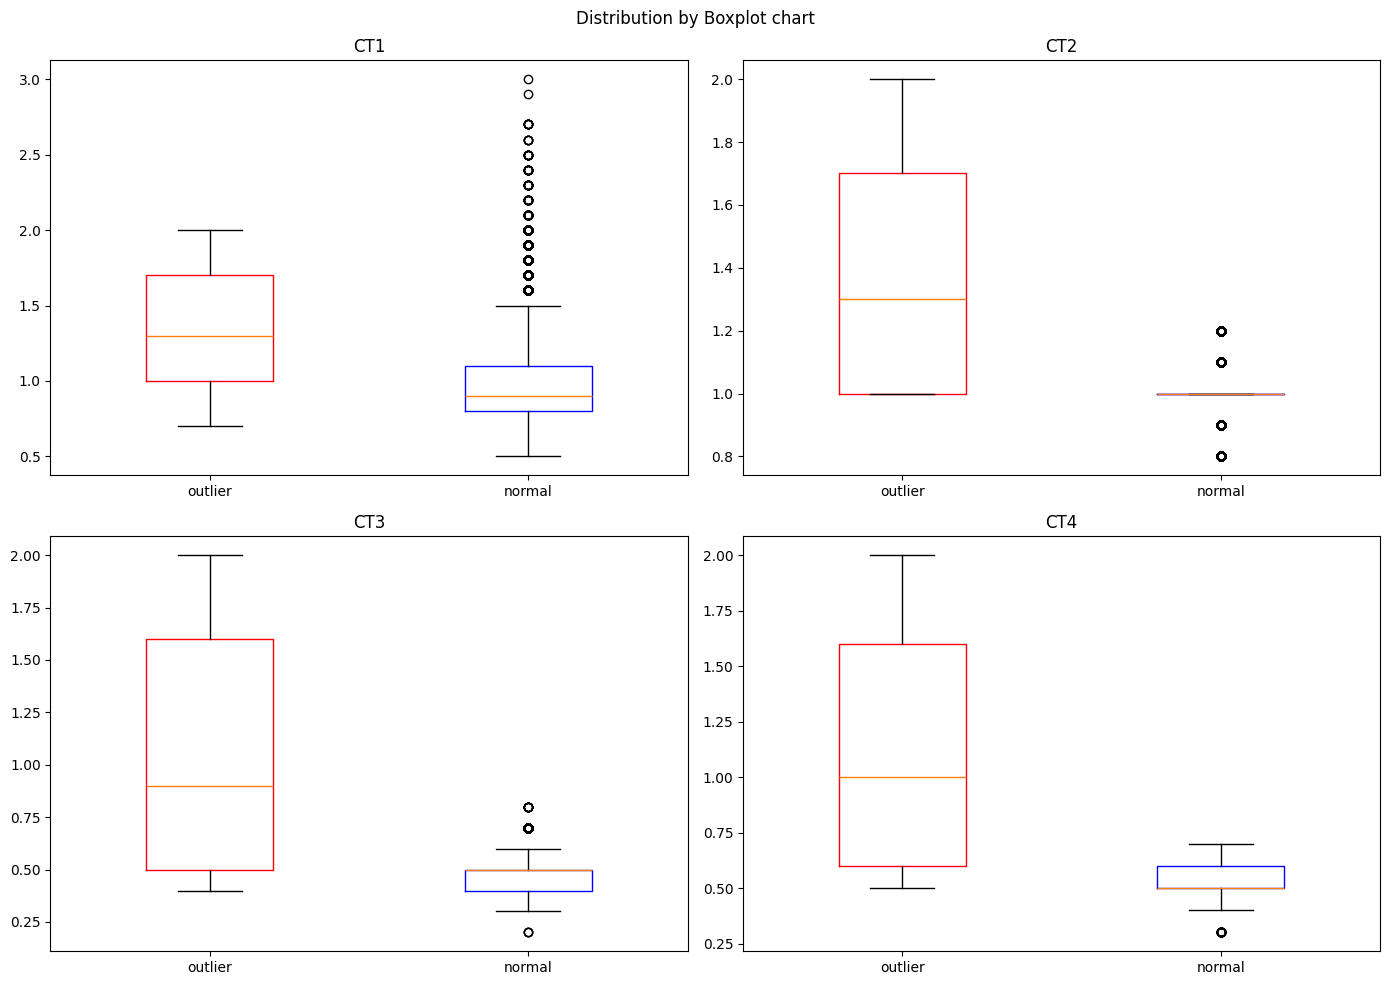

In [19]:
# box chart
ggrids = [["tem", (1, 1)], ["pma", (1, 3)], ["coa", (1, 2)], ["cta", (2, 2)]]
for ggrid, cols in zip(ggrids, [conf.COLUMN_TEM, conf.COLUMN_PMA, conf.COLUMN_COA, conf.COLUMN_CTA]):
    graph.boxchart(
        dfs=[dfoutl, dfnorm.iloc[: len(dfoutl)]],
        labels=["outlier", "normal"],
        cols=cols,
        grid=ggrid[1],
        pngfile=f"outl-norm-box-{ggrid[0]}.png",
    )

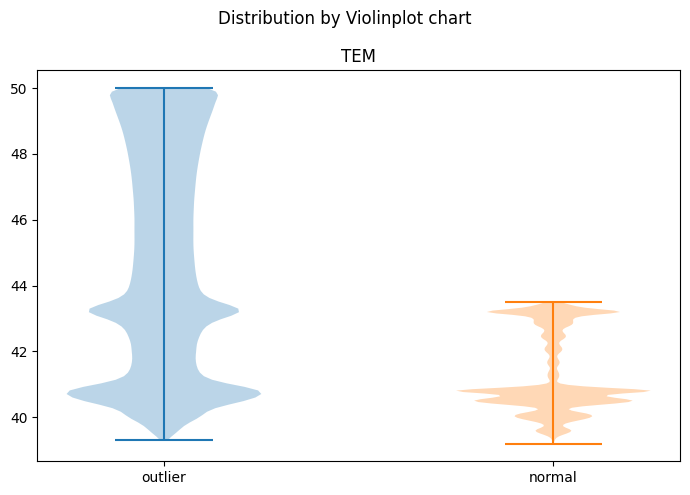

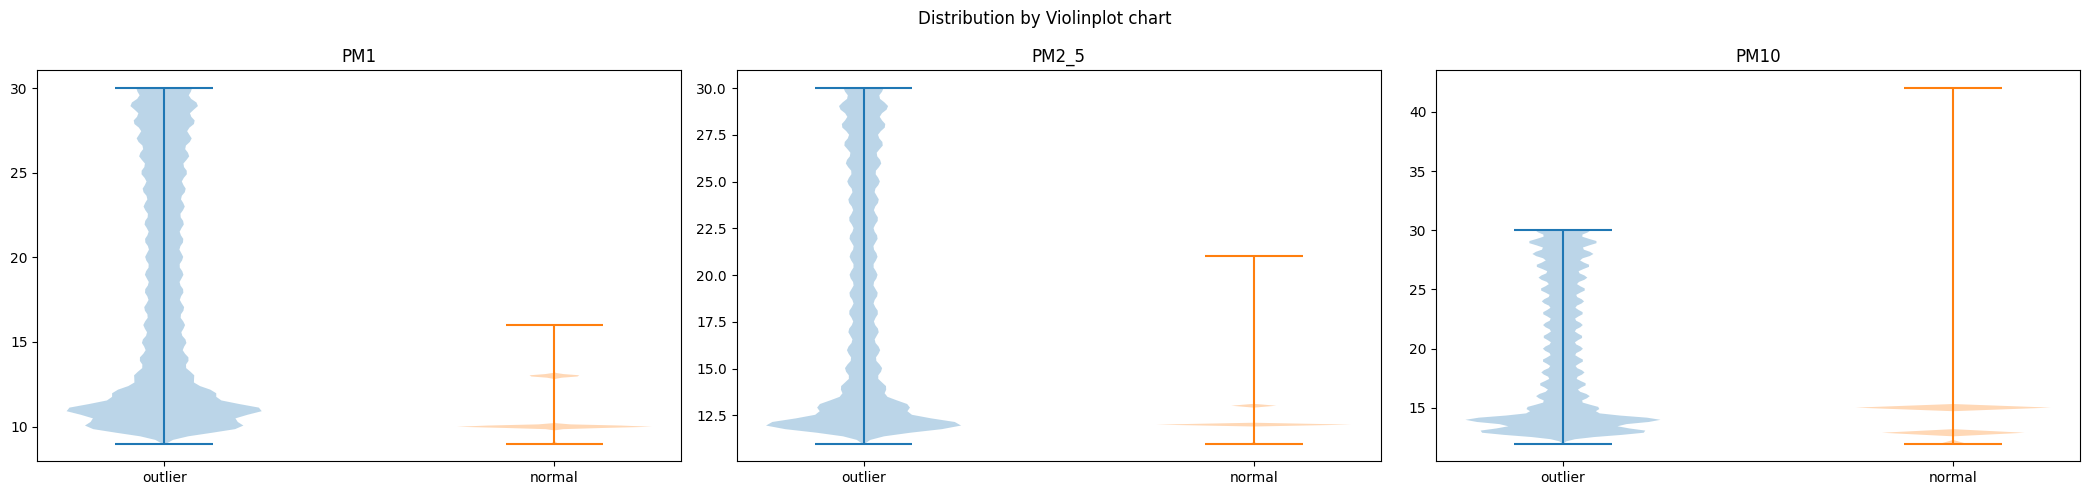

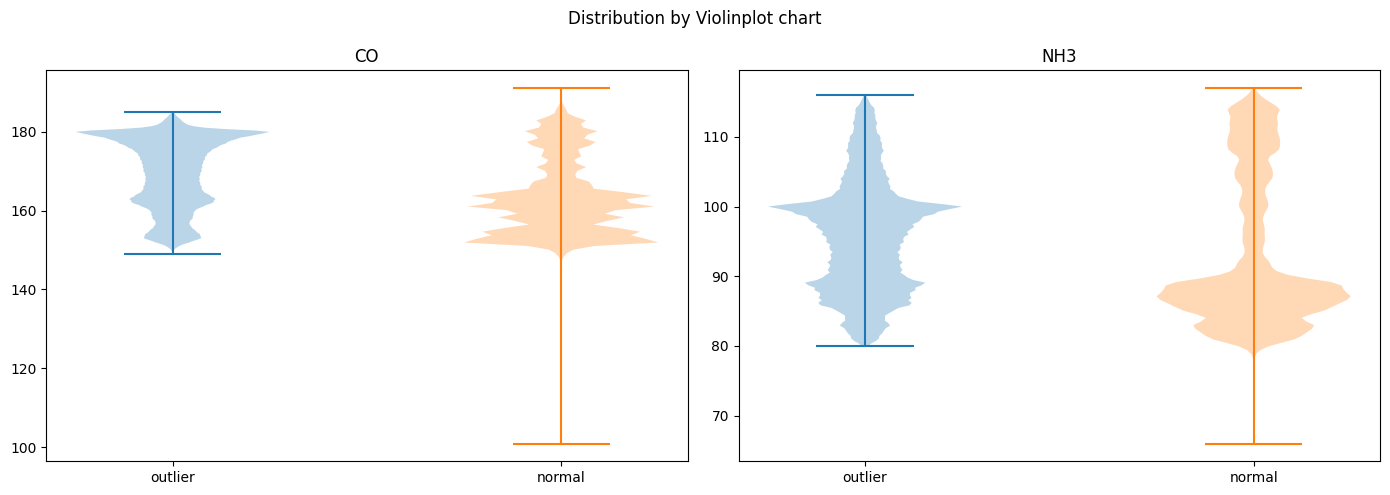

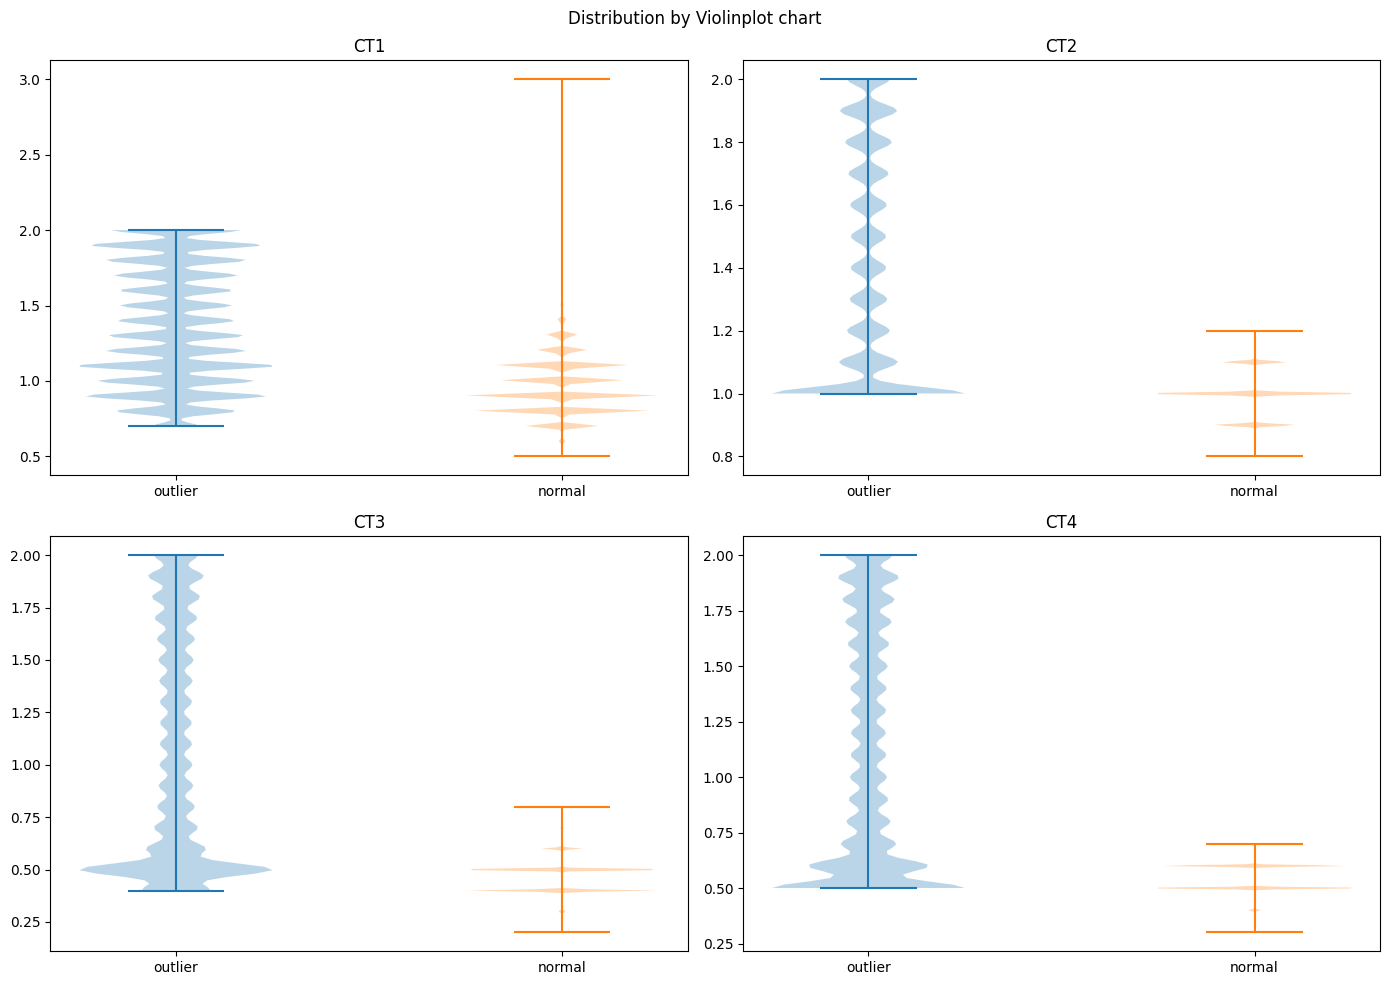

In [20]:
# violin chart
ggrids = [["tem", (1, 1)], ["pma", (1, 3)], ["coa", (1, 2)], ["cta", (2, 2)]]
for ggrid, cols in zip(ggrids, [conf.COLUMN_TEM, conf.COLUMN_PMA, conf.COLUMN_COA, conf.COLUMN_CTA]):
    graph.violinchart(
        dfs=[dfoutl, dfnorm.iloc[: len(dfoutl)]],
        labels=["outlier", "normal"],
        cols=cols,
        grid=ggrid[1],
        pngfile=f"outl-norm-violin-{ggrid[0]}.png",
    )

### 데이터 상관관계 분석

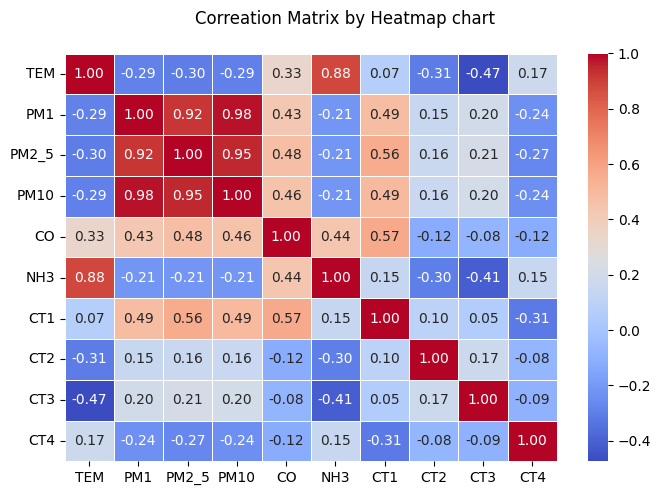

In [21]:
# heatmap chart based on correlation
graph.heatmapchart(dfnorm[conf.COLUMN_GRAPH], pngfile="norm-heatmap-all.png")

# NOTE: with large dataset, found strong(>0.75) and moderate(>0.50) correationship
# TEM-NH3: 0.88, PM1-PM2_5: 0.92, PM1-PM10: 0.98, PM2_5:PM10: 0.95, PM2_5-CT1: 0.56, CO-CT1: 0.57

In [22]:
# scatter chart
if conf.SCATTER_INCLUDE:
    for c1idx, c1name in enumerate(conf.COLUMN_GRAPH):
        if c1idx < (len(conf.COLUMN_NAMES) - 1):
            for c2idx, c2name in enumerate(conf.COLUMN_GRAPH[c1idx + 1 :]):
                graph.scatterchart(
                    dfnorm, cols=[c1name, c2name], pngfile="norm-scatter-" + "-".join([c1name, c2name]) + ".png"
                )

# """
# Correlation in between features:
# - TEM has no correlation with the other features.
# - PM1,2_5,10 has some liner correlation
# - CO, NH3 has some linear correlaton.
# - CO, NH3 and CT1~4 has some linear correlation
# - CT1~CT4 have no correlation in between them.
# """

### eof